In [90]:
%reset

import numpy as np
from scipy.stats import poisson
import pdb

import matplotlib.pyplot as pl


import time

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [91]:
def draw_from_pdf(cc, Pc, Ndraws):
    # draw random counts from P(c)
    cdf = np.cumsum(Pc)
    rands = np.random.rand(Ndraws)
    # Draw Ndraws times from Pc
    d_vec = np.searchsorted(cdf, rands)
    #pdb.set_trace()
    return d_vec

In [92]:
mean_flux = 0.001 #mean flux
N_sources_avg = 10000000  #number of sources above L_min


In [93]:
# set up luminosity distribution array
L_min = 1.0
L_max = 1000.
numL = 100
L_arr = np.exp(np.linspace(np.log(L_min), np.log(L_max), num = numL))

L_powerlaw = -2.

P_of_L = L_arr**(L_powerlaw)
P_of_L = P_of_L/np.sum(P_of_L)

In [94]:
#Method 1: draw randomly from luminosity distribution to assign each source a luminosity
# then draw Poisson random number to represent counts from each source

t1 = time.time()

#Draw number of sources
N_sources = np.random.poisson(lam = N_sources_avg)

#Draw luminosities
L_allsources = L_arr[draw_from_pdf(L_arr, P_of_L, N_sources)]

# draw a bunch of poisson random numbers representing photon counts from sources
flux =  mean_flux*L_allsources
counts = np.random.poisson(lam = flux, size = N_sources)

t2 = time.time()

print("t2-t1 = ", t2-t1)

t2-t1 =  0.8156352043151855


In [95]:
#Method 2: 
# For each luminosity bin, figure out chances that a source has zero flux.  
# Draw from binomial distribution to compute number of sources that have at least 1 photons
# then draw from Poisson distribution that has been renormalized to only be non-zero for 1 or more photons

# draw from binomial to get number of sources with 0 photons, then draw photon counts for remaining sources
t1 = time.time()

# Will store final counts
counts_all = np.array([])

#number of sources in each luminosity bin
expected_num = P_of_L*N_sources_avg

#draw number of sources for each luminosity bin
N_sources_arr = np.random.poisson(lam = expected_num)

#loop over luminosity bins
for li in range(0, numL):
    
    flux_this_bin = mean_flux*L_arr[li] #really this will depend on distance, but we ignore this here
    
    # Calculate P(C) = Poisson probability for getting C counts
    cc = np.arange(0,10)
    pc = poisson.pmf(cc, flux_this_bin)
    
    # P(C), modifed to be zero when C = 0, and renormalized
    pc_modified = np.copy(pc)
    pc_modified[0] = 0.
    pc_modified = pc_modified/np.sum(pc_modified)

    # Number of sources that will have zero photons
    N_zero = np.random.binomial(N_sources_arr[li], pc[0])
    
    # Number that will have more than zero photons
    N_nonzero = N_sources_arr[li] - N_zero
    
    # Draw photon counts for all sources that have at least one photon
    counts_nonzero = draw_from_pdf(cc, pc_modified, N_nonzero)

    #Save all these counts
    counts_all = np.append(counts_all, counts_nonzero)
    
t2 = time.time()
print("t2 - t1 = ", t2-t1)



t2 - t1 =  0.04592275619506836


Text(0, 0.5, 'Number')

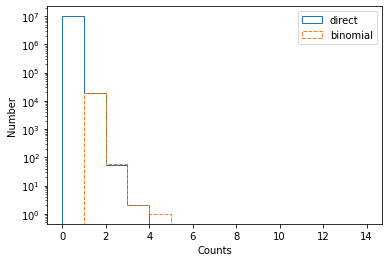

In [96]:
fig, ax = pl.subplots(1,1)
ax.hist(counts, label = 'direct', histtype = 'step', range = (0, 14), bins = 14)
ax.hist(counts_all, label = 'binomial', histtype = 'step', ls = 'dashed', range = (0, 14), bins = 14)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Counts')
ax.set_ylabel('Number')



In [119]:
#method 1

# for each radial bin

# calculate Lmin such that expected flux is super tiny.  

# calculate expected number of sources above Lmin

# draw from luminosity distribution for each source

# calculate flux for each source.  this requires multiplying energy-dependent exposure by spectrum for every source

# draw from Poisson with mean flux for each source



In [86]:
# method 2

# for each radial bin

# for each luminosity bin

# draw expected number of sources

# compute flux assuming maximal exposure.  compute P(0 photons), and draw from this binomial distribution.

# draw from Poisson with mean flux, re-normalized after removing P(C = 0)

# Once all photons have been draw, remove some with probability related to exposure

